In [40]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import np_utils

In [75]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape[0])
x_test1 = x_test
x_train = x_train.reshape(x_train.shape[0], 1, 28, 28).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28).astype('float32')
x_train = x_train / 255
x_test = x_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

60000


We Reshaped our array in the form of 6000 rows of images, in order to get the image back we reshape it back in the 
form of a 28*28 image and then we try to print it on the screen using plt.imshow to get the result as shown below

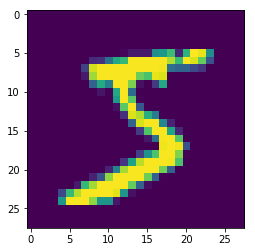

In [77]:
image_view = x_train[0]
image_view = image_view.reshape(28,28)
plt.imshow(image_view)

In [42]:
print(x_train[0])

[[[0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
  

In [29]:
from keras.layers import Activation, Conv2D, MaxPool2D, Flatten, Dropout, Dense

In [43]:
from keras.models import Sequential
model = Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape = (1,28,28)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2),dim_ordering="th"))
model.add(Dropout(0.25))

model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2),dim_ordering="th"))
model.add(Dropout(0.25))

model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2),dim_ordering="th"))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(288))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(144))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(72))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(10))
model.add(Activation('softmax'))

/home/varun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  """
/home/varun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  # Remove the CWD from sys.path while we load stuff.
/home/varun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  from ipykernel import kernelapp as app


In [44]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
model.fit(x_train,y_train,batch_size=200,epochs=15,verbose=2)

Epoch 1/15
 - 8s - loss: 1.2771 - acc: 0.5464
Epoch 2/15
 - 5s - loss: 0.6002 - acc: 0.8076
Epoch 3/15
 - 5s - loss: 0.4434 - acc: 0.8658
Epoch 4/15
 - 6s - loss: 0.3721 - acc: 0.8883
Epoch 5/15
 - 7s - loss: 0.3368 - acc: 0.9007
Epoch 6/15
 - 7s - loss: 0.3083 - acc: 0.9088
Epoch 7/15
 - 7s - loss: 0.2854 - acc: 0.9160
Epoch 8/15
 - 7s - loss: 0.2714 - acc: 0.9201
Epoch 9/15
 - 7s - loss: 0.2603 - acc: 0.9229
Epoch 10/15
 - 6s - loss: 0.2514 - acc: 0.9261
Epoch 11/15
 - 7s - loss: 0.2425 - acc: 0.9281
Epoch 12/15
 - 7s - loss: 0.2326 - acc: 0.9305
Epoch 13/15
 - 7s - loss: 0.2285 - acc: 0.9318
Epoch 14/15
 - 7s - loss: 0.2277 - acc: 0.9330
Epoch 15/15
 - 7s - loss: 0.2225 - acc: 0.9339


In [47]:
arr = model.predict(x_test, batch_size=32)

In [48]:
arr.shape

(10000, 10)

In [59]:
max(arr[0])

0.9999831

In [72]:
import numpy as np
np.argmax(arr[12])

9

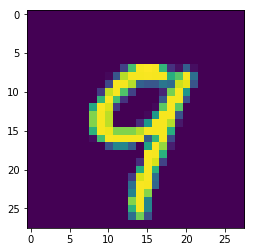

In [73]:
plt.imshow(x_test1[12])

In [74]:
print(x_test1.shape[0])

10000
